**Music and Lyrics by:** *Όνομα και ΑΜ*

# **Συστήματα και Τεχνολογίες Γνώσης**
# **Θέμα 1α**
Στο θέμα αυτό θα αναπτύξετε έναν γράφο γνώσης τον οποίο στη συνέχεια θα αξιοποιήσετε για ένα σύστημα συστάσεων (recommender system) που θα προτείνει μουσικά κομμάτια σε χρήστες.


Η παράδοση του θέματος θα γίνει μετά το πέρας της καμπάνιας όπου και θα σχηματιστεί το εμπλουτισμένο σύνολο δεδομένων (new_songs.csv). Το μη εμπλουτισμένο σύνολο (songs.csv) σας δίνεται για την εξοικείωσή σας με τις τεχνολογίες που θα χρησιμοποιήσετε.

## 1ο Μέρος: Εξοικείωση με το προγραμματιστικό περιβάλλον


Σε αυτό το μέρος θα δούμε πώς μπορούμε να δημιουργήσουμε και να εμπλουτίσουμε ένα γράφο γνώσης, να συνδέσουμε πολλαπλούς γράφους καθώς και να διατυπώνουμε SPARQL ερωτήματα, μέσα από το προγραμματιστικό περιβάλλον του notebook.

Σας δίνεται ένας πολύ απλός γράφος γνώσης στο αρχείο vivaldi.nt, ο οποίος αποτελείται από τις παρακάτω τριάδες.

```xml
<http://example.org/ns/496_MIL0882058> <http://example.org/props/publisher> <http://example.org/ns/Virgin_Classics> .
<http://example.org/ns/496_MIL0882058> <http://example.org/props/composer> <http://example.org/ns/Antonio_Vivaldi> .
<http://example.org/ns/496_MIL0882058> <http://example.org/props/year> "2011"^^<http://www.w3.org/2001/XMLSchema#date> .
<http://example.org/ns/496_MIL0882058> <http://example.org/props/title> "La_Stravaganza"^^<http://www.w3.org/2001/XMLSchema#string> .
<http://example.org/ns/496_MIL0882058> <http://example.org/props/duration> "30073"^^<http://www.w3.org/2001/XMLSchema#integer> .
<http://example.org/ns/496_LO11367666> <http://example.org/props/composer> <http://example.org/ns/Antonio_Vivaldi> .
<http://example.org/ns/496_LO11367666> <http://example.org/props/year> "2010"^^<http://www.w3.org/2001/XMLSchema#date> .
<http://example.org/ns/496_LO11367666> <http://example.org/props/title> "La follia_:_Sonate_per_violino_vivaldi"^^<http://www.w3.org/2001/XMLSchema#string>.
<http://example.org/ns/496_LO11367666> <http://example.org/props/duration> "30073"^^<http://www.w3.org/2001/XMLSchema#integer> .
<http://example.org/ns/496_LO11367666> <http://example.org/props/publisher> <http://example.org/ns/Sony_Music_Entertainment> .
```
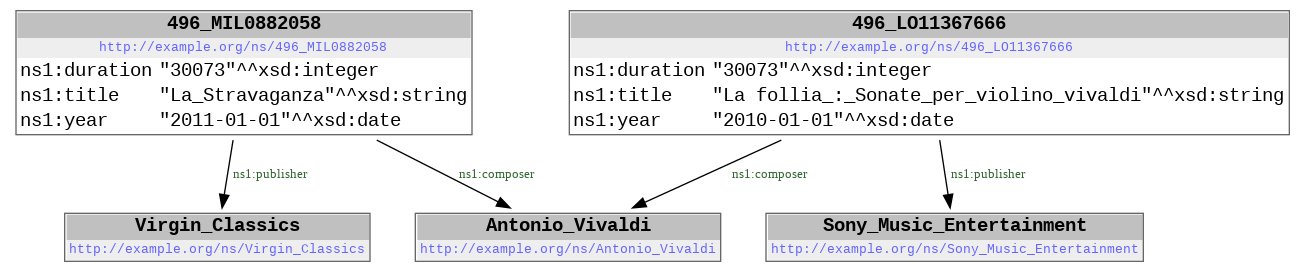

Ο γράφος αυτός περιέχει πληροφορίες για δύο μουσικά κομμάτια, την δισκογραφική που τα κυκλοφόρησε και τον συνθέτη τους. Χρησιμοποιεί δύο 'τεχνητούς' χώρους ονομάτων: http://example.org/ns/ και http://example.org/props/ όπου στον πρώτο ορίζονται τα ονόματα των οντοτήτων ενώ στο δεύτερο τα ονόματα των ιδιοτήτων τους.

Στην python μπορούμε να φορτώσουμε το γράφο με χρήση της βιβλιοθήκης rdflib.

In [2]:
!pip install rdflib

In [3]:
from rdflib import Graph, Literal, URIRef, Namespace
## Αρχικοποίηση ενός κενού γράφου
g = Graph()

## Διάβασμα του αρχείου και προσθήκη στο γράφο
g.parse('vivaldi.nt',format='nt')

## Εκτύπωση όλων των κόμβων
print("All nodes of the graph:")
for node in g.all_nodes():
  print(node)

All nodes of the graph:
http://example.org/ns/Virgin_Classics
http://example.org/ns/496_MIL0882058
http://example.org/ns/Antonio_Vivaldi
2011-01-01
La_Stravaganza
La follia_:_Sonate_per_violino_vivaldi
http://example.org/ns/496_LO11367666
2010-01-01
30073
http://example.org/ns/Sony_Music_Entertainment


Στο γράφο αυτό μπορούμε να διατυπώνουμε SPARQL ερωτήματα όπως φαίνεται στο παρακάτω κελί. 

Ποια μουσικά κομμάτια έχει συνθέσει ο Antonio Vivaldi?

In [4]:
## Τα prefixes τα ορίζουμε στην αρχή του ερωτήματος για να μην κουβαλάμε τα namespaces μέσα στο ερώτημα
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?title
       WHERE {
          ?song exp:composer ex:Antonio_Vivaldi .
          ?song exp:title ?title
       }""")
for a in ans:
  print(a)

(rdflib.term.Literal('La_Stravaganza', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)
(rdflib.term.Literal('La follia_:_Sonate_per_violino_vivaldi', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)


Στο γράφο επίσης μπορούμε να προσθέσουμε τριάδες

π.χ. για να προσθέσουμε το γεγονός πως ο Antonio Vivaldi γεννήθηκε το 1678-03-04.

In [5]:
from rdflib.namespace import XSD
## Ορίζουμε τους χώρους ονομάτων
ns1 = Namespace('http://example.org/ns/')
ns2 = Namespace('http://example.org/props/')

## URI του συνθέτη
a = URIRef(ns1+"Antonio_Vivaldi")

## URI της ιδιότητας "ημερομηνία γέννησης"
b = URIRef(ns2+"date_of_birth")

## URI της ημερομηνίας γέννησης
c = Literal("1678-03-04", datatype = XSD.date)
## Προσθήκη της τριάδας a,b,c στο γράφο
g.add((a,b,c))

## Εκτύπωση όλων των κόμβων
print("All nodes of the graph:")
for node in g.all_nodes():
  print(node)

All nodes of the graph:
http://example.org/ns/Virgin_Classics
http://example.org/ns/496_MIL0882058
http://example.org/ns/Antonio_Vivaldi
2011-01-01
La_Stravaganza
1678-03-04
La follia_:_Sonate_per_violino_vivaldi
http://example.org/ns/496_LO11367666
2010-01-01
30073
http://example.org/ns/Sony_Music_Entertainment


Παρατηρήστε πως ο κόμβος που αναφέρεται στην οντότητα του κομματιού έχει URI <<http://example.org/ns/496_MIL0882058>> και όχι <<http://example.org/ns/La_Stravaganza>>. Ο τίτλος ενός μουσικού κομματιού είναι ένα string (literal) το οποίο συνδέεται με τον αντίστοιχο κόμβο μέσω της ακμής <<http://example.org/props/title>>. Αν χρειαζόταν να βρούμε το όνομα του συγκεκριμένου κόμβου θα μπορούσαμε να το κάνουμε μέσω SPARQL

In [6]:
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?song
       WHERE {
          ?song exp:title "La_Stravaganza"^^xsd:string .
       }""")
for a in ans:
  print(a)

(rdflib.term.URIRef('http://example.org/ns/496_MIL0882058'),)


όπου το ^^xsd:string υποδηλώνει πως αναφερόμαστε σε literal τύπου string

### Ερώτημα 1.1

Δημιουργήστε έναν νέο γράφο γνώσης (g2) από πληροφορίες που θα βρείτε ψάχνοντας στο αρχείο songs.csv, όμοιο με αυτόν που σας δίνεται, στον οποίο:
- Θα χρησιμοποιούνται τα ίδια namespaces με τον γράφο που δίνεται
- Θα περιέχονται 10 με 20 τριάδες
- Θα περιέχονται τουλάχιστον δύο μουσικά κομμάτια διαφορετικά από αυτά που περιέχονται στο γράφο που δίνεται
- Τουλάχιστον ένας κόμβος του γράφου θα έχει ίδιο URI με έναν κόμβο του γράφου που δίνεται, δηλαδή θα αναφέρεται στο ίδιο αντικείμενο του κόσμου (πχ ένας συνθέτης ή μια δισκογραφική) 

Στη συνέχεια θα διατυπώσετε δύο SPARQL ερωτήματα της επιλογής σας στο γράφο αυτόν, και θα εκτυπώσετε τις απαντήσεις. Περιγράψτε τι κάνει το κάθε ένα από αυτά τα ερωτήματα.

Μπορείτε να δημιουργήσετε το γράφο είτε μέσω του κώδικα όπως δείξαμε και παραπάνω, είτε δημιουργώντας τοπικά ένα αρχείο 'ntriples' (.nt), γράφοντας "με το χέρι" τις τριάδες με τη μορφή που είναι και στο vivaldi.nt,  και μετά φορτώνοντας το αρχείο στο notebook, όπως παρουσιάσαμε και για το δοθέν αρχείο (Graph.parse()). Σε περίπτωση που δημιουργήσετε το νέο γράφο μέσω κώδικα, μην ξεχάσετε να αποθηκεύσετε το γράφο σε ένα αρχείο με κωδικοποίηση 'ntriples' τρέχοντας την εντολή
```python
g2.serialize(destination='mygraph.nt', format='nt')
```
Εκτυπώστε όλες τις τριάδες του γράφου.

**Προσοχή:** Τα κενά και ορισμένοι ειδικοί χαρακτήρες ('/') ενδέχεται να δημιουργήσουν προβλήματα στην αναπαράσταση του γράφου μέσω των βιβλιοθηκών της python, για αυτό το λόγο όπως θα δείτε και παρακάτω αντικαθιστούμε τα κενά με κάτω\_παύλα ('\_'). Συνίσταται να χρησιμοποιείτε μόνο αλφαριθμητικούς χαρακτήρες και την κάτω_παύλα για ονόματα οντοτήτων και ιδιοτήτων.

In [7]:
from rdflib import Graph, Literal, URIRef, Namespace

## Αρχικοποίηση ενός κενού γράφου g2 
g2 = Graph()

## Διάβασμα του αρχείου και προσθήκη στο γράφο
g2.parse('mygraph.nt',format='nt')

## Εκτύπωση όλων των κόμβων
print("All nodes of the graph:")
for node in g2.all_nodes():
  print(node)

## ΠΡΕΠΕΙ ΝΑ ΓΡΑΨΟΥΜΕ ΚΑΙ ΔΥΟ SPARQL ΕΡΩΤΗΜΑΤΑ ΓΙΑ ΤΟ ΓΡΑΦΟ G2 !!!!!!!!!!!!!!!!!!!!!!!!!

All nodes of the graph:
Italian_Concertos
http://example.org/ns/Antonio_Vivaldi
http://example.org/ns/Luis_Bacalov
Ernani
http://example.org/ns/496_TSA1398198
http://example.org/ns/Emi_Classics
Il_Postino
http://example.org/ns/496_RAV1999539
http://example.org/ns/496_MIL0876436
2012-01-01
2010-01-01
30073
http://example.org/ns/Sugar
http://example.org/ns/Sony_Music_Entertainment
http://example.org/ns/Giuseppe_Verdi


### Ερώτημα 1.2

Σε έναν νέο γράφο θα φορτώσετε και τα δύο αρχεία (mygraph.nt, vivaldi.nt) και θα διατυπώσετε ένα SPARQL ερώτημα στην απάντηση του οποίου να φαίνεται πως οι δύο γράφοι είναι συνδεδεμένοι.

Για να φορτώσετε δύο αρχεία στον ίδιο γράφο τρέχετε τις εντολές
```
g = Graph()
g.parse('vivaldi.nt',format='nt')
g.parse('mygraph.nt',format='nt')
```

In [8]:
## Απάντηση 1.2

## Αρχικοποίηση ενός κενού γράφου g3 
g3 = Graph()

## Φορτώνουμε τα δύο αρχεία στον ίδιο γράφο
g3.parse('vivaldi.nt',format='nt')
g3.parse('mygraph.nt',format='nt')

##Ερώτημα SPARQL
ans=g3.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?composer
       WHERE {
          ex:496_TSA1398198 exp:composer ?composer .
          ex:496_MIL0882058 exp:composer ?composer . 
       }""")

print("SPARQL Query Answer : ")
for a in ans:
  print(a)

SPARQL Query Answer : 
(rdflib.term.URIRef('http://example.org/ns/Antonio_Vivaldi'),)


Καθώς υπάρχει απάντηση στο παραπάνω QUERY (Antonia_Vivaldi), αποδεικνύεται ότι οι δύο γράφοι είναι συνδεδεμένοι. Ο κόμβος ex:496_TSA1398198 ανήκει μόνο στον γράφο mygraph.nt, ενώ ο κόμβος ex:496_MIL0882058 ανήκει μόνο στον γράφο vivaldi.nt. Επιπλέον, οι δύο κόμβοι έχουν κοινό composer-παιδί τον Antonio_Vivaldi.  

## 2o Μέρος: Ανάπτυξη γράφου γνώσης





Σε αυτό το μέρος θα αναπτύξετε το γράφο γνώσης που θα χρησιμοποιηθεί για το σύστημα συστάσεων, αξιοποιώντας ετερογενή δεδομένα από διαφορετικές πηγές. Συγκεκριμένα θα συλλέξετε δεδομένα από:
- Το αρχείο songs.csv που σας δίνεται
- Το γράφο γνώσης [Wikidata](https://www.wikidata.org/wiki/Wikidata:Main_Page)

Για την εξαγωγή πληροφορίας από το csv αρχείο μπορείτε να χρησιμοποιήσετε τη βιβλιοθήκη [pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide).

Εδώ να σημειώσουμε ξανά ότι θα σας δοθεί σε δεύτερο χρόνο το εμπλουτισμένο αρχείο new_songs.csv το οποίο θα προκύψει από τη διαδικασία crowdsourcing του θέματος 1β. Με βάση αυτό το αρχείο θα πρέπει να παραδώσετε το τελικό σας θέμα.

In [9]:
import pandas as pd
df = pd.read_csv('new_songs.csv').drop("Unnamed: 0", axis=1)
df.head()

Europeana ID  \
0  2059210/data_sounds_http___archive_org_downloa...   
1  9200369/webclient_DeliveryManager_pid_7649526_...   
2                                     446/MIL0869097   
3                                     496/MOD1575994   
4  9200369/webclient_DeliveryManager_pid_9796872_...   

                                               Title                   Genres  \
0                       Selling the Cool Car For You            Rock, Country   
1                                 I vespri siciliani         Opera, Classical   
2                     Set me free : ten years after             Rock, Country   
3                                      Sulla strada                      Rock   
4  Verklarte Nacht op. 4 ; Pelleas und Melisande ...  Instrumental, Classical   

            Emotions                   Instruments  Year  Duration  \
0      Joy, Calmness        Drums, Electric Guitar  2012    237819   
1       Arousal, Joy                     Orchestra  2007     30000   
2  Arousal, Pleasure  Electric Guitar, Drums, Bass  2010     30073   
3       Arousal, Joy        Electric Guitar, Drums  2009     30073   
4  Calmness, Sadness                     Orchestra  1998     30049   

           Composer DateOfBirth DateOfDeath  \
0       Mick Thomas  1960-02-07         NaN   
1    Giuseppe Verdi  1813-10-10  1901-01-27   
2   Max Iannantuono         NaN         NaN   
3  Massimo Priviero         NaN         NaN   
4  Arnold Schönberg         NaN         NaN   

                                           Biography            Publisher  \
0  Michael James Thomas (born 7 February 1960, Ya...                  NaN   
1  Giuseppe Fortunino Francesco Verdi (9 or 10 Oc...            Testament   
2                                                NaN                 Edel   
3                                                NaN      Universal Music   
4                                                NaN  Deutsche Grammophon   

       Place  
0  Australia  
1    Britain  
2        NaN  
3        NaN  
4     Berlin

Με την παραπάνω εντολή φορτώσαμε το περιεχόμενο του αρχείου σε ένα *dataframe* το οποίο είναι ουσιαστικά ένας πίνακας. Κάθε στήλη του πίνακα είναι ένα pandas Series - ουσιαστικά μια λίστα. Για να πάρουμε το i-οστό στοιχείο μιας στήλης μπορούμε να γράψουμε (πχ. για τη στήλη 'composer'):
```python
composer = df['Composer'][i]
```
Για να πάρουμε πχ. όλα τα ζεύγη μουσικών κομματιών και συνθετών θα γράφαμε:
```python
for i in range(df.shape[0]):
  song = df['Title'][i]
  composer = df['Composer'][i]
```
Τέλος μπορούμε να φιλτράρουμε ένα dataframe και να κρατήσουμε όσες γραμμές του πίνακα ικανοποιούν κάποια συνθήκη. πχ για να πάρουμε όλες τις γραμμές που αναφέρονται σε κομμάτια που περιέχουν το EMI Classics στις δισκογραφικές:

```python
df_EMI = df[df['publisher'].str.contains('EMI Classics')]
```

Γενικά τα pandas είναι μια πολύ δυνατή βιβλιοθήκη με πάρα πολλές λειτουργίες, και θα βρείτε πολύ υλικό στο διαδίκτυο (documentation, tutorials, παραδείγματα) εάν θέλετε να το ψάξετε παραπάνω.

### Ερώτημα 2.1

Κατασκευάστε έναν γράφο γνώσης για όλα τα μουσικά κομμάτια και με όλες τις πληροφορίες που υπάρχουν στο αρχείο songs.csv που σας δίνεται.

*Προσοχή 1: Σε κάποια πεδία του csv δεν υπάρχουν καταχωρήσεις. Θα πρέπει να γίνεται έλεγχος και να το χειριστείτε κατάλληλα.*   
*Προσοχή 2: Τα κενά και ορισμένοι ειδικοί χαρακτήρες ("/", " ' ") ενδέχεται να δημιουργήσουν προβλήματα στην αναπαράσταση του γράφου μέσω των βιβλιοθηκών της python, για αυτό το λόγο όπως θα δείτε και παρακάτω αντικαθιστούμε τα κενά με κάτω\_παύλα ('\_'). Συνίσταται να χρησιμοποιείτε μόνο αλφαριθμητικούς χαρακτήρες και την κάτω_παύλα για ονόματα οντοτήτων και ιδιοτήτων.*   

In [10]:
# Απάντηση 2.1
## Read csv and create rdf
import pandas as pd
from rdflib import Graph, Literal, URIRef, Namespace,XSD

g4 = Graph()

songs = pd.read_csv('new_songs.csv')
print(songs.info()) 

ns1 = Namespace('http://example.org/ns/')
ns2 = Namespace('http://example.org/props/')

for i in range(songs.shape[0]):
    song_id = songs['Europeana ID'][i]
    a = URIRef(ns1+song_id)
    #Song hasTitle 
    titles = songs['Title'][i]
    titles = titles.replace(' ','_')
    titles = titles.replace('/','_')
    titles = titles.replace(':','_')
    titles = titles.replace(';','_')
    b = URIRef(ns2+'hasTitle')
    c = Literal(titles, datatype=XSD.string)
    g4.add((a,b,c))
    #Song hasDuration
    duration = songs['Duration'][i]
    e = Literal(duration, datatype=XSD.int)
    d = URIRef(ns2+'hasDuration')
    g4.add((a,d,e))
    #Song hasGenre
    if(not pd.isnull(songs.loc[i ,'Genres'])) : 
        genres = songs['Genres'][i]
        f = URIRef(ns2+'hasGenre')
        genres = genres.replace(',',' ')
        genre = genres.split()
        for genre in genre:
            g = Literal(genre, datatype=XSD.string)
            g4.add((a,f,g))
    #Song hasEmotions
    if(not pd.isnull(songs.loc[i ,'Emotions'])) : 
        emotions = songs['Emotions'][i]
        h = URIRef(ns2+'hasEmotions')
        emotions = emotions.replace(',',' ')
        emotion = emotions.split()
        for emotion in emotion:
            z = Literal(emotion, datatype=XSD.string)
            g4.add((a,h,z))
    #Song hasInstruments
    if(not pd.isnull(songs.loc[i ,'Instruments'])) : 
        instruments = songs['Instruments'][i]
        j = URIRef(ns2+'hasInstruments')
        instruments = instruments.replace(',',' ')
        instrument = instruments.split()
        for instrument in instrument:
            k = Literal(instrument, datatype=XSD.string)
            g4.add((a,j,k))    
    #Song hasYear
    year = songs['Year'][i]
    l = URIRef(ns2+'hasDuration')
    m = Literal(year, datatype=XSD.int)
    g4.add((a,l,m))
    #Song hasComposer
    if(not pd.isnull(songs.loc[i ,'Composer'])) : 
        composer = songs['Composer'][i]
        composer = str(composer)
        composer = composer.replace(' ','_')
        composer = composer.replace('&',"and")
        n = URIRef(ns2+'hasComposer')
        o = URIRef(ns1+composer)
        g4.add((a,n,o))
        q = """
          PREFIX exp: <http://example.org/props/>
          PREFIX ex: <http://example.org/ns/>

          SELECT DISTINCT ?DateOfBirth
           WHERE {
              ex:"""+composer+""" exp:hasDateOfBirth ?DateOfBirth .
           }"""
        ans=g4.query(q)
        #Composer hasDateOfBirth
        if(not pd.isnull(songs.loc[i ,'DateOfBirth']) and ans.bindings == []) :
            DateOfBirth = songs['DateOfBirth'][i]
            p = URIRef(ns2+'hasDateOfBirth')
            q = Literal(DateOfBirth, datatype=XSD.date)
            g4.add((o,p,q))
        #Composer hasDateOfDeath
        q = """
          PREFIX exp: <http://example.org/props/>
          PREFIX ex: <http://example.org/ns/>

          SELECT DISTINCT ?DateOfDeath
           WHERE {
              ex:"""+composer+""" exp:hasDateOfDeath ?DateOfDeath .
           }"""
        ans=g4.query(q)
        if(not pd.isnull(songs.loc[i ,'DateOfDeath']) and ans.bindings == []) :    
            DateOfDeath = songs['DateOfDeath'][i]
            r = URIRef(ns2+'hasDateOfDeath')
            s = Literal(DateOfDeath, datatype=XSD.date)
            g4.add((o,r,s))
        #Composer hasPublisher
        q = """
          PREFIX exp: <http://example.org/props/>
          PREFIX ex: <http://example.org/ns/>

          SELECT DISTINCT ?Publisher
           WHERE {
              ex:"""+composer+""" exp:hasPublisher ?Publisher .
           }"""
        ans=g4.query(q)
        if(not pd.isnull(songs.loc[i ,'Publisher']) and ans.bindings == []) : 
            publisher = songs['Publisher'][i]
            publisher = str(publisher)
            publisher = publisher.replace(' ','_')
            t = URIRef(ns2+'hasPublisher')
            u = URIRef(ns1+publisher)
            g4.add((o,t,u))
    #Song hasPublisher
    if(not pd.isnull(songs.loc[i ,'Publisher'])) : 
        publisher = songs['Publisher'][i]
        publisher = str(publisher)
        publisher = publisher.replace(' ','_')
        v = URIRef(ns2+'hasPublisher')
        w = URIRef(ns1+publisher)
        g4.add((a,t,u))
    #Song hasPlace
    if(not pd.isnull(songs.loc[i ,'Place'])) : 
        place = songs['Place'][i]
        place = str(place)
        place = place.replace(' ','_')
        x = URIRef(ns2+'hasPlace')
        y = Literal(place, datatype=XSD.string)
        g4.add((a,x,y)) 
        
## Εκτύπωση όλων των κόμβων
print("All nodes of the graph:")
counter = 0
for node in g4.all_nodes():
    counter += 1
print(counter)

#g4.serialize(destination='g4graph.nt', format='nt')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    854 non-null    int64 
 1   Europeana ID  854 non-null    object
 2   Title         854 non-null    object
 3   Genres        848 non-null    object
 4   Emotions      851 non-null    object
 5   Instruments   846 non-null    object
 6   Year          854 non-null    int64 
 7   Duration      854 non-null    int64 
 8   Composer      838 non-null    object
 9   DateOfBirth   401 non-null    object
 10  DateOfDeath   199 non-null    object
 11  Biography     487 non-null    object
 12  Publisher     649 non-null    object
 13  Place         198 non-null    object
dtypes: int64(3), object(11)
memory usage: 93.5+ KB
None
All nodes of the graph:
2501


### Ερώτημα 2.2


Για την ανάκτηση πληροφορίας από το γράφο των Wikidata θα κάνετε SPARQL queries στο SPARQL endpoint που διαθέτουν. Συγκεκριμένα μέσω της βιβλιοθήκης requests της python, θα στέλνετε ένα http GET request με δύο παραμέτρους:  

*   '*format*' που καθορίζει σε τί μορφή θα έρθει η απάντηση (json), και
*   '*query*' που περιέχει το SPARQL ερώτημα που θέλουμε να απαντηθεί.

Για παράδειγμα το παρακάτω κομμάτι κώδικα δημιουργεί το κατάλληλο SPARQL query και "χτυπάει" το Wikidata SPARQL endpoint για να πάρουμε όλους τους κόμβους του γράφου που έχουν σε κάποιο από τα αγγλικά (@en) labels τους (skos:altLabel|skos:prefLabel|rdfs:label) τη συμβολοσειρά "Wolfgang Amadeus Mozart". 

Προσοχή! τα labels είναι case sensitive και απαιτούν να προσδιορίζεται και η γλώσσα του label, π.χ. εδω Αγγλικά (@en)! 

In [11]:
import requests

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Wolfgang Amadeus Mozart\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})


Ύστερα, για να πάρουμε τις απαντήσεις διαβάζουμε το json που επεστράφη:

In [12]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
    print(entity["uri"]["value"])

1
http://www.wikidata.org/entity/Q254


Μπορείτε να κάνετε δοκιμές για τα SPARQL queries προς Wikidata στο [Wikidata Query Service](https://query.wikidata.org/). 

**Χρήσιμοι σύνδεσμοι:**

[Wikidata:SPARQL query service](https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service) και όλοι οι σύνδεσμοι που βρίσκονται στο κομμάτι "Learning SPARQL", με κυριότερους τους:

[SPARQL Tutorial](https://www.wikidata.org/wiki/Wikidata:SPARQL_tutorial)

[SPARQL query service/queries](https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service/queries) 

[SPARQL query service/queries/examples](https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service/queries/examples).

Όμοια τώρα με τη συμβολοσειρά "Giuseppe Verdi".

In [13]:
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Giuseppe Verdi\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

In [14]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

12
http://www.wikidata.org/entity/Q3771609
http://www.wikidata.org/entity/Q7317
http://www.wikidata.org/entity/Q1768473
http://www.wikidata.org/entity/Q3771608
http://www.wikidata.org/entity/Q3771610
http://www.wikidata.org/entity/Q52808313
http://www.wikidata.org/entity/Q52824268
http://www.wikidata.org/entity/Q52831519
http://www.wikidata.org/entity/Q52832471
http://www.wikidata.org/entity/Q52856219
http://www.wikidata.org/entity/Q52942600
http://www.wikidata.org/entity/Q52989468


#### 2.2.1 Ποιά βασική διαφορά παρατηρείτε ως προς το σύνολο απαντήσεων για την περίπτωση της συμβολοσειράς Wolfgang Amadeus Mozart και Giuseppe Verdi αντίστοιχα;  

Απάντηση 2.2.1:
Η συμβολοσειρά Wolfgang Amadeus Mozart είχε μόνο ένα αποτέλεσμα δηλαδή 

#### 2.2.2 Εάν ψάχναμε (μόνο) την οντότητα του  συνθέτη Wolfgang Amadeus Mozart το παραπάνω query σύμφωνα με το label είναι αρκετό; Για την περίπτωση του συνθέτη Giuseppe Verdi;  
 

Απάντηση 2.2.2:
όχι πρέπει να προσθέσουμε και το statement ότι είναι Instance της κλάσης άνθρωπος για να αποφύγουμε συνονόματες ταινίες,βιβλία και άλλα πιθανά referencies

#### 2.2.3 Από τη σελίδα των wikidata για τον συνθέτη Giuseppe Verdi μπορείτε να εντοπίσετε κάποια χαρακτηριστικά (αναφέρονται ως Statements στη σελίδα των Wikidata) που τον διαφοροποιούν από τις υπόλοιπες οντότητες που μας επέστρεψε το παραπάνω query; Δώστε τουλάχιστον δύο (2) παραδείγματα. 

Απάντηση 2.2.3:
human
gender

#### Σύνθετα Queries
Για να κάνουμε πιο σύνθετα ερωτήματα πρέπει να ξέρουμε τα αναγνωριστικά των ιδιοτήτων και των κόμβων όπως είναι ορισμένα στα Wikidata. Αυτά μπορούμε να τα ανακτήσουμε είτε με SPARQL ερωτήματα όπως το παραπάνω, ή ψάχνοντας "χεράτα" στα Wikidata. Για παράδειγμα η ιδιότητα "είναι" (instance of) περιγράφεται [εδώ](https://www.wikidata.org/wiki/Property:P31) και έχει αναγνωριστικό ([wikidata identifier](https://www.wikidata.org/wiki/Wikidata:Identifiers)) P31. Η έννοια "μουσικό είδος" (music genre) περιγράφεται [εδώ](https://www.wikidata.org/wiki/Q188451) και έχει αναγνωριστικό Q188451.  
Έτσι εάν ψάχνουμε την οντότητα του μουσικού είδους "opera" εάν κάνουμε αναζήτηση μόνο με το label θα δούμε πως επιστρέφονται μαζί κι άλλες οντότητες οι οποίες δεν μας ενδιαφέρουν αυτή τη στιγμή. Για αυτό δημιουργούμε ένα πιο σύνθετο query στο οποίο υπάρχει η απαίτηση οι οντότητες που θα επιστραφούν να "είναι" (instance of) μουσικά είδη. 

*Προσοχή στα prefixes! Χρησιμοποιούμε wd για τις οντότητες και wdt για τις ιδιότητες (see "Our first query" [here](https://www.wikidata.org/wiki/Wikidata:SPARQL_tutorial)), αυτά είναι τα μόνα που θα μας χρειαστούν στο πλαίσιο της παρούσας άσκησης.*

In [15]:
# Simple query by label (only)

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"opera\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

In [16]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

3
http://www.wikidata.org/entity/Q1344
http://www.wikidata.org/entity/Q1592769
http://www.wikidata.org/entity/Q3354534


In [17]:
# More "complex" query by label and "instance of"
# P31 : instance of 
# Q188451 : music genre

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"opera\"@en .
            ?uri wdt:P31 wd:Q188451. 
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

In [18]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

1
http://www.wikidata.org/entity/Q1344


Σε συνέχεια των παραπάνω ερωτήσεων (2.2.1 - 2.2.3):  

#### 2.2.4. Προσπαθήστε να δημιουργήσετε ένα SPARQL query με βάση τις παρατηρήσεις σας στο 2.2.3 που να επιστρέφει μόνο την οντότητα του συνθέτη Giuseppe Verdi. 
Σε μια σελίδα wikidata μπορείτε να δείτε το αναγνωριστικό μιας εννοιας (wikidata identifier) αφήνοντας (hovering) τον κέρσορα πάνω από το όνομά της όπως εμφανίζεται στα Statements, καθώς και να πλοηγηθείτε στην αντίστοιχη σελίδα πατώντας πάνω στο όνομα-σύνδεσμο.

In [19]:
# Απάντηση 2.2.4

# P31 : instance of 
# Q5 : human

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Giuseppe Verdi\"@en .
            ?uri wdt:P31 wd:Q5. 
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

1
http://www.wikidata.org/entity/Q7317


#### 2.2.5. Μπορείτε να τροποποιήσετε το αρχικό query που χρησιμοποιεί μόνο τα labels ώστε να επιστρέφεται μόνο η επιθυμητή οντότητα όπως στο 2.2.4;  

<!-- Hint for 2.2.5: "Also known as..." -> altLabel -->

In [20]:
# Απάντηση 2.2.5

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Giuseppe Fortunino Francesco Verdi\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

1
http://www.wikidata.org/entity/Q7317


#### 2.2.6 Βρείτε την έννοια του συνθέτη Igor Stravinsky στο γράφο των wikidata "χεράτα" (μέσω απλης αναζήτησης στο διαδίκτυο) και δώστε το link για την αντίστοιχη σελίδα στα wikidata.  

Απάντηση 2.2.6:

Link ->
https://www.wikidata.org/wiki/Q7314

#####**Hint:** 

https://lmgtfy.app/?q=igor+stravinsky+wikidata

#### 2.2.7 Δημιουργήστε ένα ερώτημα SPARQL για να πάρετε την ίδια έννοια (του συνθέτη Igor Stravinsky) μέσω του ονόματός του (label). 


In [21]:
# Απάντηση 2.2.7

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Igor Fyodorovich Stravinsky\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

1
http://www.wikidata.org/entity/Q7314


#### 2.2.8 Το ερώτημα που σχηματίσατε επιστρέφει την επιθυμητή οντότητα;  
#### Επιστρέφει μόνο την επιθυμητή οντότητα;  


Απάντηση 2.2.8: 
Ναι

#### 2.2.9 Εάν όχι με ποιούς τρόπους θα μπορούσατε να πάρετε μόνο την επιθυμητή οντότητα; διαμορφώστε το κατάλληλο SPARQL query κι επιβεβαιώστε.  
Εάν στο προηγούμενο ερώτημα επιστρέφεται μόνο η επιθυμητή οντότητα τότε μπορείτε να παραλείψετε αυτό το ερώτημα.  


Απάντηση 2.2.9:

-

#### 2.2.10 Υπάρχει τρόπος να πάρετε μόνο την επιθυμητή οντότητα αποκλειστικά μέσω των labels (όπως στα παραπάνω παραδείγματα με τους Giuseppe Verdi και Wolfgang Amadeus Mozart); Εάν ναι, δημιουργήστε το κατάλληλο query.  


Απάντηση 2.2.10:

Η ιδιότητα "εργάζεται" (occupation) περιγράφεται [εδώ](https://www.wikidata.org/wiki/Property:P106) και έχει αναγνωριστικό P106. Το επάγγελμα του συνθέτη περιγράφεται [εδώ](https://www.wikidata.org/wiki/Q36834) και έχει αναγνωριστικό Q36834. Η ιδιότητα "χώρα πολιτογράφησης" βρίσκεται εδώ με αναγνωριστικό P27. Η χώρα "Γαλλία" περιγράφεται [εδώ](https://www.wikidata.org/wiki/Q142) με αναγνωριστικό Q142. Η ιδιότητα "έχει συνθέσει" περιγράφεται [εδώ](https://www.wikidata.org/wiki/Property:P86) με αναγνωριστκό P86. Η ιδιότητα "έχει κερδίσει βραβείο" περιγράφεται [εδώ](https://www.wikidata.org/wiki/Property:P166) με αναγνωριστικό P166, η ιδιότητα "μέρος του" περιγράφεται [εδώ](https://www.wikidata.org/wiki/Property:P361) με αναγνωριστικό P361 και τέλος τα βραβεία Grammy περιγράφονται [εδώ](https://www.wikidata.org/wiki/Q41254) με αναγνωριστικό Q41254.

#### 2.2.11 Δημιουργήστε ένα ερώτημα SPARQL προς το wikidata SPARQL endpoint για να πάρουμε όλους τους συνθέτες που έχουν γαλλική υπηκοότητα οι οποίοι να έχουν κερδίσει βραβείο που είναι μέρος της κατηγορίας Grammy. Οι οντότητες που αναφέρονται παραπάνω είναι αρκετές για αυτό το ερώτημα. 
**Περιγράψτε το query που δημιουργήσατε.**

Απάντηση 2.2.11:

In [22]:
# Απάντηση 2.2.11

#Ιδιότητες
#P106 : has occupation
#P27 : is from country 
#P166 : has won price
#P86 : has composed
#P361 : part of

#Αναγνωριστικά 
#Q36834 : composer
#Q142 : France
#Q41254 : Grammy award

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT DISTINCT ?uri   
          WHERE {
            ?uri wdt:P106 wd:Q36834. 
            ?uri wdt:P27 wd:Q142. 
            ?uri wdt:P166 ?award.
            ?award wdt:P361 wd:Q41254.
        }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json()
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

http://www.wikidata.org/entity/Q231276
http://www.wikidata.org/entity/Q471656
http://www.wikidata.org/entity/Q7314
http://www.wikidata.org/entity/Q206244
http://www.wikidata.org/entity/Q105487
http://www.wikidata.org/entity/Q313362


#### 2.2.12 Τροποποιήστε το παραπάνω query (2.2.11) ωστε να επιστρέφει το πλήθος των συνθετών. 

In [23]:
# Απάντηση 2.2.12
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT (COUNT(DISTINCT ?uri) AS ?sum)  
          WHERE {
            ?uri wdt:P106 wd:Q36834. 
            ?uri wdt:P27 wd:Q142. 
            ?uri wdt:P166 ?award.
            ?award wdt:P361 wd:Q41254.
        }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json()
for entity in data["results"]["bindings"]:
  print(entity["sum"]["value"])

6


#####**Hint 1**:  

COUNT

#####**Hint 2:**

 Η απάντηση είναι 6. 
<!-- Hidden hint: use DISTINCT -->

#### 2.2.13 Τροποποιήστε το query που κατασκευάσατε στο 2.2.11 ώστε να επιστρέφει **τους τίτλους** των βραβείων Grammy.

In [24]:
# Απάντηση 2.2.13
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT DISTINCT ?award   
          WHERE {
            ?composer wdt:P106 wd:Q36834. 
            ?composer wdt:P27 wd:Q142. 
            ?composer wdt:P166 ?award.
            ?award wdt:P361 wd:Q41254.
        }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json()
for entity in data["results"]["bindings"]:
  print(entity["award"]["value"])

http://www.wikidata.org/entity/Q5593905
http://www.wikidata.org/entity/Q935843
http://www.wikidata.org/entity/Q740968
http://www.wikidata.org/entity/Q1619268
http://www.wikidata.org/entity/Q3774289
http://www.wikidata.org/entity/Q4376972
http://www.wikidata.org/entity/Q5593848



#### 2.2.14 Τροποποιήστε το query του 2.2.11 ώστε (από τους συνθέτες που επέστρεψε προηγουμένως) να επιστρέφει μόνο συνθέτες που έχουν κερδίσει πάνω από ένα (1) βραβείο Grammy.  


In [27]:
# Απάντηση 2.2.14

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT DISTINCT ?uri (COUNT(?award) AS ?count)   
        WHERE {
            ?uri wdt:P106 wd:Q36834. 
            ?uri wdt:P27 wd:Q142. 
            ?uri wdt:P86?/wdt:P166 ?award.
            ?award wdt:P361|wdt:P31 wd:Q41254.
        }
        GROUP BY ?uri
        HAVING(?count > 1)"""

r = requests.get(endpoint, params = {'format': 'json', 'query': query})
print(r)
data = r.json()

for entity in data["results"]["bindings"]:
    print(entity["uri"]["value"],entity["count"]["value"])

<Response [200]>
http://www.wikidata.org/entity/Q105487 2
http://www.wikidata.org/entity/Q313362 2
http://www.wikidata.org/entity/Q471656 2
http://www.wikidata.org/entity/Q7314 4


#### 2.2.15 Τροποποιήστε το query του ερωτήματος 2.2.13 ώστε να επιστρέφει τους συνθέτες ταξινομημένους  ως προς το πλήθος των βραβείων Grammy σε φθίνουσα σειρά: πρώτος ο συνθέτης με τα περισσότερα βραβεία, καθώς και την αντίστοιχη τιμή του πλήθους των βραβείων.

In [26]:
# Απάντηση 2.2.15

# Απάντηση 2.2.13
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT DISTINCT ?award   
          WHERE {
            ?uri wdt:P106 wd:Q36834. 
            ?uri wdt:P27 wd:Q142. 
            ?uri wdt:P166 ?award.
            ?award wdt:P361 wd:Q41254.
          GROUP BY
        }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json()
for entity in data["results"]["bindings"]:
    print(entity["award"]["value"])

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

#### 2.2.16 Δημιουργήστε ένα query προς τα Wikidata το οποίο επιστρέφει τις οντότητες των συνθετών, καθώς και το όνομά τους, οι οποίοι έχουν κερδίσει έστω κι ένα βραβείο Grammy (οποιασδήποτε κατηγορίας) και έχουν συνθέσει τουλάχιστον 20 μουσικά κομμάτια, σε φθίνουσα σειρά ως προς το πλήθος των Grammy που έχουν κερδίσει. Εκτυπώστε τις οντότητες μαζί με το αντίστοιχο όνομα και τον αριθμό των μουσικών κομματιών που έχουνε συνθέσει.

In [ ]:
# Απάντηση 2.2.16

### Ερώτημα 2.3
Εμπλουτίστε το γράφο που κατασκευάσατε στο προηγούμενο ερώτημα, προσθέτοντας επιπλέον πληροφορία από το γράφο των Wikidata.

Συγκεκριμένα:  
#### 2.3.1: Προσθέστε αρχικά όσες ημερομηνίες θανάτου και γέννησης των συνθετών υπάρχουν και μπορείτε.  
#### 2.3.2: Διαμορφώστε κατάλληλο SPARQL query προς το γράφο σας για να ελέγξετε πόσες ημερομηνίες βρήκατε.  
#### 2.3.3: Στη συνέχεια μπορείτε να προσθέσετε στο γράφο σας ό,τι πληροφορία κρίνετε εσείς σχετική και χρήσιμη, διαμορφώνοντας (τουλάχιστον 3) κατάλληλα SPARQL queries προς τα wikidata, και προσθέτοντας την αντίστοιχη πληροφορία μαζικά στο γράφο σας. Έχετε κατά νου πως ο συγκεκριμένος γράφος θα χρησιμοποιηθεί στη συνέχεια για να αναπτύξετε έναν recommender άρα να σκεφθείτε διάφορα χαρακτηριστικά που θα μπορούσαν να φανούν χρήσιμα.  

Για κάθε συνθέτη του γράφου σας μπορείτε να βρείτε την αντίστοιχη οντότητα στα wikidata μέσω κατάλληλων ερωτημάτων SPARQL μέσω του ονόματος του και της ιδιότητας "εργάζεται". Τα labels που θα γίνει η αναζήτηση συνίσταται να είναι στα αγγλικά (@en) και η ιδιότητα "εργάζεται" να έχει πολλαπλές τιμές (π.χ. composer ή musician).

*Προσοχή 1: όποια πληροφορία προσθέτετε στο γράφο πρέπει να είναι συνεπής, δηλαδή εάν εμπλουτίσετε το γράφο με νέα πληροφορία πριν δημιουργήσετε νέες οντότητες πρέπει να σιγουρευτείτε πως δεν υπάρχουν ήδη, διότι μπορεί να δημιουργήσετε ένα γράφο όπου υπάρχουν πολλά διαφορετικά ονόματα (άρα και κόμβοι του γράφου) όπου αναφέρονται όμως στην ίδια έννοια. Δηλαδή εάν θέλετε να προσθέσετε την πληροφορία πως ο Antonio Vivaldi έχει συνθέσει το μουσικό κομμάτι La Stravaganza πρέπει πρώτα να ελέγξετε εάν υπάρχει ήδη η οντότητα που αντιστοιχεί στον συνθέτη Antonio Vivaldi, εάν δεν υπάρχει να τη δημιουργήσετε, και στη συνέχεια να προσθέσετε την αντίστοιχη ιδιότητα (hasComposer για παράδειγμα) στην οντότητα του μουσικού κομματιού La Stravaganza.* 

*Προσοχή 2: είναι πολύ πιθανό η πληροφορία που αναζητείτε να μην υπάρχει σε όλες τις οντότητες των wikidata, άρα θα πρέπει να διαχειριστείτε κατάλληλα τις αντίστοιχες απαντήσεις (πιθανότατα θα έχει κάποια απάντηση της μορφής None).*

*Προσοχή 3: Το wikidata δεν αφήνει να γίνονται πάνω από 30 queries το λεπτό. Για να κάνετε μαζικά queries θα πρέπει να περιμένετε 2 δευτερόλεπτα μετά από κάθε query με* ```time.sleep()```

*Προσοχή 4: Ορισμένοι συνθέτες είναι μουσικά συγκροτήματα, άρα δεν έχουν ημερομηνίες γέννησης και θανάτου.*

<!-- Hint: Μια καλή ιδέα για τον εμπλουτισμό του γράφου θα ήταν η προσθήκη μιας ιδιότητας που να αναφέρεται στην περίοδο ίδρυσης ενός μουσικού συγκροτήματος. Αυτό είναι σημαντικό για ένα σύστημα συστάσεων γιατί όπως η πληροφορία για τις ημερομηνίες γέννησης και θανάτου ενός συνθέτη, μπορεί να μας πει πότε περίπου γράφτηκε ένα μουσικό κομμάτι.-->


In [39]:
# Απάντηση 2.3
# O γράφος μας είναι ο g4
import time

songs = pd.read_csv('new_songs.csv')

ns1 = Namespace('http://example.org/ns/')
ns2 = Namespace('http://example.org/props/')

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

for i in range(songs.shape[0]):
    if(not pd.isnull(songs.loc[i ,'Composer'])) :
            composer = songs['Composer'][i]
            composer_for_graph = str(composer)
            composer_for_graph = composer_for_graph.replace(' ','_')
            c = URIRef(ns1+composer_for_graph)
            b = URIRef(ns2+'hasDateOfBirth')
            d = URIRef(ns2+'hasDateOfDeath')
            print(composer)
            #Έλεγχος εάν υπάρχει ήδη Date of Birth για τον composer στο γράφο (g4)
            q = """
                      PREFIX exp: <http://example.org/props/>
                      PREFIX ex: <http://example.org/ns/>

                      SELECT DISTINCT ?DateOfBirth
                       WHERE {
                          ex:"""+composer_for_graph+""" exp:hasDateOfBirth ?DateOfBirth .
                }"""
            ans=g4.query(q)
            #Query στη Wikidata για αναζήτηση του DateOfBirth
            if(ans.bindings == []) :
                query = """SELECT ?DateOfBirth 
                                  WHERE {
                                    ?composer rdfs:label \""""+composer+"""\"@en .
                                    ?composer wdt:P31 wd:Q5.
                                    ?composer wdt:P569 ?DateOfBirth.
                                    ?composer wdt:P106 wd:Q36834.
                                }"""
                r = requests.get(endpoint, params = {'format': 'json', 'query': query})
                data = r.json()
                for entity in data["results"]["bindings"]:
                    print("Wikidata entry DateOfBirth of " + composer, entity["DateOfBirth"]["value"])
                    DateOfBirth = entity["DateOfBirth"]["value"]
                    print(DateOfBirth[0:10]) 
                    l = Literal(DateOfBirth[0:10], datatype=XSD.date)
                    g4.add((c,b,l))
                time.sleep(2)
            #Έλεγχος εάν υπάρχει ήδη Date of Death για τον composer στο γράφο (g4)
            q = """
                    PREFIX exp: <http://example.org/props/>
                    PREFIX ex: <http://example.org/ns/>
                    SELECT DISTINCT ?DateOfDeath
                    WHERE {
                    ex:"""+composer_for_graph+""" exp:hasDateOfDeath ?DateOfDeath .
                       }"""
            ans=g4.query(q)
            #Query στη Wikidata για αναζήτηση του DateOfDeath 
            if(ans.bindings == []) :
                query = """SELECT ?DateOfDeath
                                  WHERE {
                                    ?composer rdfs:label \""""+composer+"""\"@en .
                                    ?composer wdt:P31 wd:Q5.
                                    ?composer wdt:P570 ?DateOfDeath.
                                    ?composer wdt:P106 wd:Q36834.
                                }"""
                r = requests.get(endpoint, params = {'format': 'json', 'query': query})
                data = r.json()
                for entity in data["results"]["bindings"]:
                    print("Wikidata entry DateOfDeath of " + composer , entity["DateOfDeath"]["value"])
                    DateOfDeath = entity["DateOfDeath"]["value"]
                    f = Literal(DateOfDeath[0:10], datatype=XSD.date)
                    g4.add((c,d,f)) #hasDateOfDeath(d) DateOfDeath(f)
                time.sleep(2) 

    song_id = songs['Europeana ID'][i]
    a = URIRef(ns1+song_id)
    title = songs['Title'][i]
    print("Song : " , title)
    
    #2.3.3 i) Θα προσθέσουμε γλώσσα τραγουδιού (song_lang)
    #P407 : language of work (song)
    query = """SELECT ?song_lang
                                  WHERE {
                                    ?song rdfs:label \""""+title+"""\"@en.
                                    ?song wdt:P407 ?song_lang.
                                    ?composer rdfs:label \""""+composer+"""\"@en .
                                    ?composer wdt:P31 wd:Q5.
                                    ?song wdt:P86 ?composer
                                }"""
    r = requests.get(endpoint, params = {'format': 'json', 'query': query})
    data = r.json()
    for entity in data["results"]["bindings"]:
        print("Language of song :  " + title , entity["song_lang"]["value"])
        #NA TO KANΩ ADD !!!!!!!!!!!!!!!!!!!!!
    time.sleep(2)
    
    #2.3.3 ii) Θα προσθέσουμε εθνικότητα τραγουδιστή (composer_country)     
    query = """SELECT ?composer_country 
                                  WHERE {
                                    ?composer rdfs:label \""""+composer+"""\"@en .
                                    ?composer wdt:P31 wd:Q5.
                                    ?composer wdt:P27 ?composer_country
                                }"""
    r = requests.get(endpoint, params = {'format': 'json', 'query': query})
    data = r.json()
    for entity in data["results"]["bindings"]:
        print("Country of composer :  " + composer , entity["composer_country"]["value"]) #NA ΠΡΟΣΘΕΣΩ ΝΑ ΓΥΡΝΑΕΙ ΤΟ LABELLLLL !!!!
        # KANTA ADD !!!!!!!!!!!!!!!!
    
    if(i > 20) : 
        break
    
#Question 2.3.2
#Θα ελένξουμε πόσες ημερομηνίες προσθέσαμε 

#Question 2.3.3 

#Θα προσθέσουμε #Awards(Grammy) ΚΑΛΛΙΤΈΧΝΗ (composer_NumOfAwards)

#Θα προσθέσουμε και notable work καλλιτέχνη (composer_bestwork)
#            Tι ακριβώς θα κάναμε εδώ ; Θα ψάχναμε εάν υπάρχει κάποιο τραγούδι από τα Notable work στο γράφο μας για το χαρακτηρίσουμε έτσι ; 

#Θα προσθέσουμε social media followers (composer_followers) #twitter followers


Mick Thomas
Song :  Selling the Cool Car For You
Country of composer :  Mick Thomas http://www.wikidata.org/entity/Q408
Giuseppe Verdi
Song :  I vespri siciliani
Language of song :  I vespri siciliani http://www.wikidata.org/entity/Q652
Country of composer :  Giuseppe Verdi http://www.wikidata.org/entity/Q172579
Max Iannantuono
Song :  Set me free : ten years after 
Massimo Priviero
Song :  Sulla strada 
Country of composer :  Massimo Priviero http://www.wikidata.org/entity/Q38
Arnold Schönberg
Song :  Verklarte Nacht op. 4 ; Pelleas und Melisande op.5
Giuseppe Verdi
Song :  Messa da requiem 
Country of composer :  Giuseppe Verdi http://www.wikidata.org/entity/Q172579
Kevn Kinney
Song :  90 MPH In A 30 Mile Zone
Country of composer :  Kevn Kinney http://www.wikidata.org/entity/Q30
Il Teatro degli Orrori
Song :  A sangue freddo
Camper Van Beethoven
Song :  Circles
Giorgio Gaber
Song :  Con tutta la rabbia, con tutto l'amore
Country of composer :  Giorgio Gaber http://www.wikidata.org/en

## 3ο Μέρος: Σύστημα Συστάσεων

### Ερώτημα 3.1
Σκεφτείτε **ένα σύνολο** από SPARQL queries που δεδομένου ενός μουσικού κομματιού που αρέσει σε έναν από τους χρήστες, του προτείνει νέα μουσικά κομμάτια. Για παράδειγμα ένα τέτοιο query θα μπορούσε να είναι τα μουσικά κομμάτια του ίδιου συνθέτη.

In [ ]:
def simple_recommender(graph,song):
  ans=graph.query(
      """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?song
        WHERE {
          ex:"""+song+""" exp:hasComposer ?x.
            ?song exp:hasComposer ?x.
        }""")
  
  ans = [a['song'].toPython().replace(ns1,'') for a in ans]
  return ans

Δημιουργήστε (τουλάχιστον) 2 recomenders όπως φαίνεται παραπάνω (simple_recomender) οι οποίοι θα χρησιμοποιούν τα SPARQL queries που σκεφτήκατε προηγουμένως. Τα queries που θα χρησιμοποιήσετε θα πρέπει να είναι πιο σύνθετα από το παράδειγμα, δηλαδή να μην αναζητούν απλά έναν κοινό κόμβο. Περιγράψτε τους recommender / τα query σας.

In [76]:

q = """
    PREFIX exp: <http://example.org/props/>
    PREFIX ex: <http://example.org/ns/>

    SELECT (COUNT(?composer) AS ?count_dob) 
    WHERE {
            ?composer exp:hasDateOfBirth ?DateOfBirth.
          }"""
ans=g4.query(q)
for row in ans:
    print("Total Dates of Birth before Wikidata :", row['count_dob'])
    dob_start = row['count_dob']

q = """
    PREFIX exp: <http://example.org/props/>
    PREFIX ex: <http://example.org/ns/>

    SELECT (COUNT(?composer) AS ?count_dod) 
    WHERE {
            ?composer exp:hasDateOfDeath ?DateOfDeath.
          }"""
ans=g4.query(q)
for row in ans:
    print("Total Dates of Death before wikidata: " , row['count_dod'])
    dod_start = row['count_dod']


Total Dates of Birth before Wikidata : 99
Total Dates of Death before wikidata:  50


### Ερώτημα 3.2

Στο αρχείο users.txt κάθε γραμμή αναφέρεται στα μουσικά κομμάτια που αρέσουν σε έναν χρήστη (10 χρήστες συνολικά). Για να αξιολογήσετε το σύστημα συστάσεων που υλοποιήσατε θα μετρήσετε precision και recall όταν τροφοδοτείτε το πρώτο μουσικό κομμάτι της κάθε γραμμής στο σύστημα συστάσεων, υπολογίζοντας:
- Precision: τί ποσοστό των μουσικών κομματιών που προτείνει το σύστημά σας αρέσουν όντως στο χρήστη;
- Recall: τί ποσοστό των μουσικών κομματιών που αρέσουν στο χρήστη έχετε προτείνει;

Οι εξισώσεις που περιγράφουν την λειτουργία των μετρικών αυτών παρουσιάζονται παρακάτω:

$$Precision=\frac{tp}{tp+fp}$$
όπου:
* $tp$: είναι ο αριθμός των μουσικών κομματιών που αρέσουν στον χρήστη και προβλέφθηκαν σωστά, 
* $fp$: είναι ο αριθμός των μουσικών κομματιών που προβλέφθηκαν λανθασμένα ότι αρέσουν στον χρήστη 

Το άθροισμα $fp+fp$ ουσιαστικά ίσουται με τον αριθμό των μουσικών κομματιών που προβλέφθηκε ότι αρέσει στον χρήστη.

$$Recall=\frac{tp}{tp + fn}$$

όπου:
* fn: είναι ο αριθμός των μουσικών κομματιών που προβλέφθηκαν λανθασμένα ότι δεν αρέσουν στον χρήστη. 

Πρακτικά το άθροισμα $fn+tp$ ισούται με τον αριθμό των μουσικών κομματιών που όντως αρέσουν στον χρήστη.

Σε δεύτερο χρόνο θα σας δοθεί ένα αρχείο new_users.txt το οποίο θα βασίζεται στα δικά σας αγαπημένα τραγούδια. Με αυτό τον τρόπο θα αξιολογήσετε τα συστήματα συστάσεων σας με βάση τις δικές σας προτιμήσεις. Επίσης είναι σημαντικό να σκεφτείτε νέα συστήματα συστάσεων όταν σας δοθεί το εμπλουτισμένο σύνολο δεδομένων, αξιοποιώντας τη νέα γνώση που θα περιέχουν.





In [ ]:
# Απάντηση 3.2


##After exercise suggestions:

###Composers of the exercise:

####  **Giuseppe Verdi**
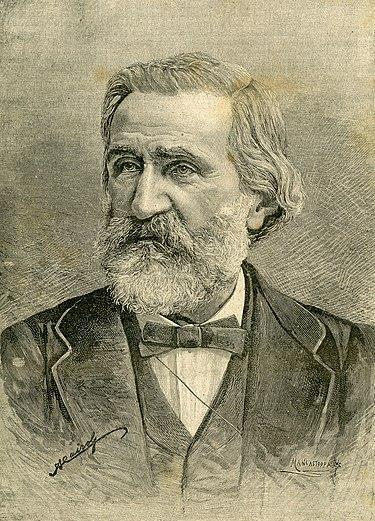

#### **Wolfgang Amadeus Mozart**
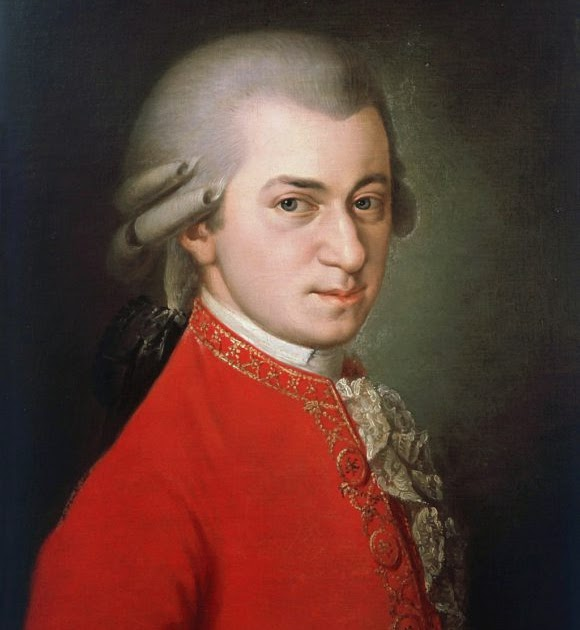

#### **Igor Stravinsky**
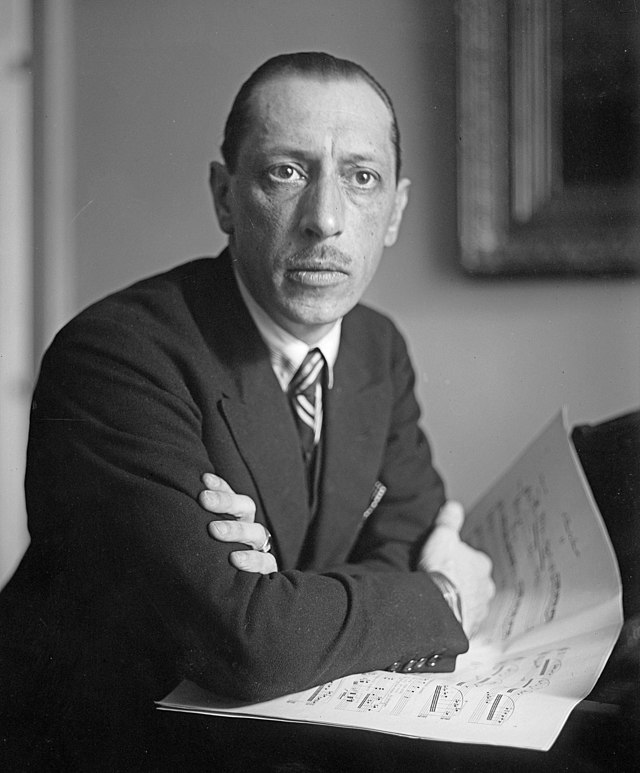

###Any suggestions by you?